<h1><center>Backpropagation and Calculating Gradients</center></h1>
<center>Author: <b>Umang Tiwari</b>
<p>In this notebook we perform curve fitting on some generated polynomial data using a Fully Connected Feed Forward Neural Network<p>
<p> We have used the Keras library in order to create the neural net. The NN architecture has 2 hidden layers, 1 input neuron and 1 output neuron. Each hidden layer consists of 16 neurons <p>

<h3>Loss Function and Gradient Descent</h3>
<p>Loss function is a way to measure whether the algorithm is doing a good job — This is necessary to determine the distance between the algorithm’s current output and its expected output. The measurement is used as a feedback signal to adjust the way the algorithm works. This adjustment step is what we call learning.<p>
<p>The loss function we have used in this network is:<p> <b>Mean Squared Error(MSE)</b>
$$\frac{1}{N}\sum_{i=1}^{N}(Y_i - \hat{Y}_i)^2$$
    <p>It’s the square difference between the current output y_pred and the expected output y_true divided by the number of output. <p>
        
<h3> Regression Problem </h3>
<p>For the kind of regression problem we've been examining, the resulting plot of loss vs. weight will always be convex. In other words, the plot will always be bowl-shaped. Convex problems have only one minimum; that is, only one place where the slope is exactly 0. That minimum is where the loss function converges.</p>

<h3> Gradient Descent </h3>
<p>Gradient Descent is one of the mechanisms to find the minimum of the convex plot that we mentioned in the Regression Problem. The gradient is nothing but the slope at any point on the convex plot. Gradient Descent, therefore, is the mechanism where we try to reach the minimum point by finding the slope at the current point on the plot<p>

\begin{split}f'(m,b) =
   \begin{bmatrix}
     \frac{df}{dm}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
    \end{bmatrix}\end{split}
    
<p>To solve for the gradient, we iterate through our data points using our new m and b values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.<p>
    
 
<h3>Backpropagation</h3>
<p>Backpropagation is the most common training algorithm for neural networks. It makes gradient descent feasible for multi-layer neural networks. The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

1 Physical GPUs, 1 Logical GPUs


Max of X is: 99.5
Max of y is: 8915120.628256395
(220, 1)
(220, 1)


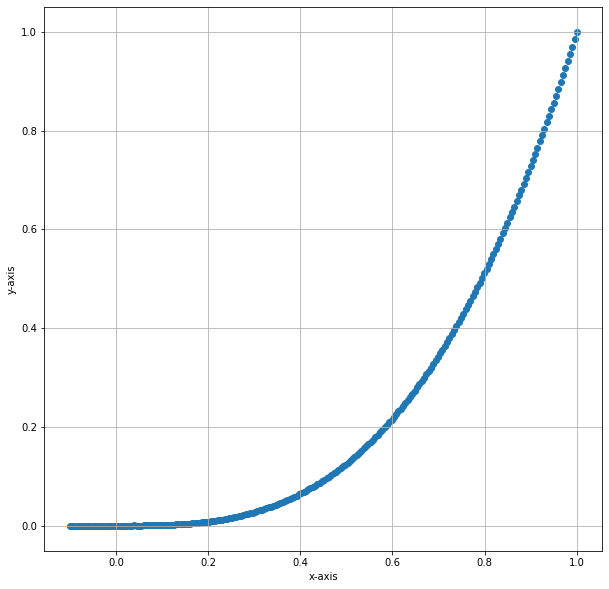

In [4]:
def generate_data():
    X = np.arange(-10,100,0.5)
    y = 9*X**3 + 5*X**2 + np.random.randn(220)*1000
    return X,y

X,y = generate_data()
print("Max of X is:",max(X))
print("Max of y is:",max(y))
X = X/max(X)
y =y/max(y)

X=np.reshape(X,(-1,1))
y=np.reshape(y,(-1,1))
print(X.shape)
print(y.shape)

f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.scatter(X,y)
plt.grid(True)
plt.show()


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(146, 1)
(146, 1)
(74, 1)
(74, 1)


In [6]:
model = keras.Sequential([
    keras.layers.Dense(16, activation ="relu", input_dim=1),
    keras.layers.Dense(16,activation = "relu",input_dim=16),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


<h3>Neural Network Architecture</h3>
<h6>Fully connected feed forward neural network</h6>
<p>Loss function: <b>Mean Squared Error</b></p>
<p>Optimizer: <b>Stochastic Gradient Descent</b></p>
<p>Activation function: <b>ReLU</b></p>

In [7]:
model.compile(loss='mean_squared_error',optimizer='SGD')
history = model.fit(X_train,y_train,validation_split = 0.33, batch_size=10, epochs=500)

Epoch 1/500
10/10 [==============================] - 2s 76ms/step - loss: 0.1100 - val_loss: 0.0363
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0662 - val_loss: 0.0295
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0506 - val_loss: 0.0270
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.0264
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.0260
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 0.0256
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0372 - val_loss: 0.0250
Epoch 8/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0302 - val_loss: 0.0244
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0364 - val_loss: 0.0236
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0365 - val_loss: 0.0229
Epoch 11

10/10 [==============================] - 0s 5ms/step - loss: 0.0085 - val_loss: 0.0063
Epoch 84/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 85/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 86/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 87/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 88/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 89/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 90/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 91/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 92/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 93/500


10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 165/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 166/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 167/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 168/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 169/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 170/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 171/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 172/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 173/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0029
Epoc

10/10 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 246/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 247/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 248/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 249/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 250/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 251/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 252/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 253/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 254/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0016
Epoc

10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 9.3520e-04
Epoch 326/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 9.1033e-04
Epoch 327/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 9.1097e-04
Epoch 328/500
10/10 [==============================] - 0s 5ms/step - loss: 9.5392e-04 - val_loss: 9.6071e-04
Epoch 329/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.3142e-04
Epoch 330/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 9.2014e-04
Epoch 331/500
10/10 [==============================] - ETA: 0s - loss: 0.002 - 0s 5ms/step - loss: 0.0013 - val_loss: 8.9726e-04
Epoch 332/500
10/10 [==============================] - 0s 6ms/step - loss: 8.7282e-04 - val_loss: 8.8508e-04
Epoch 333/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 8.9444e-04
Epoch 334/500
10/10 [================

10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 6.1981e-04
Epoch 402/500
10/10 [==============================] - 0s 6ms/step - loss: 9.0394e-04 - val_loss: 6.1393e-04
Epoch 403/500
10/10 [==============================] - 0s 5ms/step - loss: 9.3676e-04 - val_loss: 5.9945e-04
Epoch 404/500
10/10 [==============================] - 0s 6ms/step - loss: 9.1061e-04 - val_loss: 5.8582e-04
Epoch 405/500
10/10 [==============================] - 0s 6ms/step - loss: 7.3842e-04 - val_loss: 5.9106e-04
Epoch 406/500
10/10 [==============================] - 0s 5ms/step - loss: 7.7825e-04 - val_loss: 5.8089e-04
Epoch 407/500
10/10 [==============================] - 0s 6ms/step - loss: 7.6100e-04 - val_loss: 5.9406e-04
Epoch 408/500
10/10 [==============================] - 0s 6ms/step - loss: 8.3954e-04 - val_loss: 5.9810e-04
Epoch 409/500
10/10 [==============================] - 0s 6ms/step - loss: 9.3505e-04 - val_loss: 5.9476e-04
Epoch 410/500
10/10 [================

10/10 [==============================] - 0s 6ms/step - loss: 5.2659e-04 - val_loss: 4.1798e-04
Epoch 477/500
10/10 [==============================] - 0s 5ms/step - loss: 4.9230e-04 - val_loss: 4.1353e-04
Epoch 478/500
10/10 [==============================] - 0s 6ms/step - loss: 5.3222e-04 - val_loss: 4.1405e-04
Epoch 479/500
10/10 [==============================] - 0s 6ms/step - loss: 7.5522e-04 - val_loss: 4.0705e-04
Epoch 480/500
10/10 [==============================] - 0s 5ms/step - loss: 6.6834e-04 - val_loss: 3.9785e-04
Epoch 481/500
10/10 [==============================] - 0s 5ms/step - loss: 4.5530e-04 - val_loss: 3.9730e-04
Epoch 482/500
10/10 [==============================] - 0s 5ms/step - loss: 6.3364e-04 - val_loss: 4.0303e-04
Epoch 483/500
10/10 [==============================] - 0s 5ms/step - loss: 6.8712e-04 - val_loss: 4.0345e-04
Epoch 484/500
10/10 [==============================] - 0s 6ms/step - loss: 5.4610e-04 - val_loss: 4.0142e-04
Epoch 485/500
10/10 [============

dict_keys(['loss', 'val_loss'])


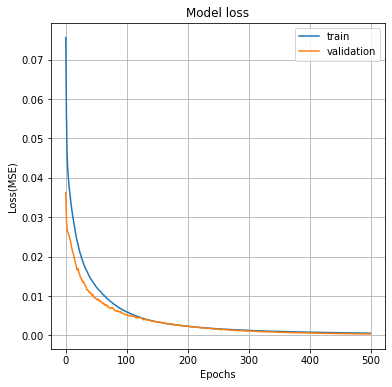

In [8]:
print(history.history.keys())
f=plt.figure()
f.set_figwidth(6)
f.set_figheight(6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.legend(['train','validation'])
plt.grid(True)
plt.show()

<h3>Plot analysis</h3>
<p> In the above plot we can see how the model loss decreases as the training iterations/epochs progress. This decrease in loss is achieved by computing the gradient in weight space of the neural network with respect to the MSE loss function by<b> Backpropagation</b> <p>

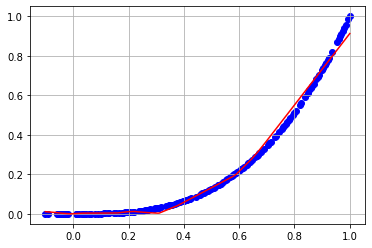

In [9]:
plt.scatter(X_train,y_train,c='blue')
plt.plot(X,model.predict(X),color="red")

plt.grid(True)

plt.show()

<h3>Plot analysis</h3>
<p> The above plot depicts the curve fit predicted by our model. The model can fit better to the generated data by increasing epochs, hidden layers, neurons in each layer, or using optimizers like <b>Adam</b> <p>

In [10]:
#Verifying MSE
predictions = model.predict(X_test)
MSE = 0
n=0
for y_hat,y_pred in zip(y_test,predictions):
    MSE+=(y_hat-y_pred)**2
    n+=1
MSE = MSE/n
print("Mean Squared error on test set: {}".format(MSE))

Mean Squared error on test set: [0.00035849]
